In [1]:
pip install numpy networkx scipy matplotlib tabulate 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json

# Générer des coordonnées aléatoires pour les villes
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    cities = np.random.rand(num_cities, 2) * 100
    return cities

# Générer un graphe aléatoire
def generate_random_graph(num_nodes, avg_degree, seed=42):
    np.random.seed(seed)
    G = nx.gnm_random_graph(num_nodes, int(num_nodes * avg_degree / 2), seed=seed)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = np.random.rand() * 10
    return G

# Calculer les plus courts chemins dans le graphe d'origine
def calculate_shortest_paths(G):
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Construire le graphe complet avec les longueurs des plus courts chemins
def build_complete_graph(shortest_paths, num_nodes):
    complete_graph = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            complete_graph[i, j] = shortest_paths[i][j]
    return complete_graph

# Sauvegarder les données dans un fichier texte
def save_to_file(cities, distances, filename):
    data = {
        "cities": cities.tolist(),
        "distances": distances.tolist()
    }
    with open(filename, 'w') as f:
        json.dump(data, f)

# Exemple d'utilisation
num_cities = np.random.randint(21, 132)  # Nombre de sommets entre 21 et 131
avg_degree = np.random.uniform(1, 4)  # Degré moyen aléatoire réaliste

# Génération des villes et du graphe aléatoire
cities = generate_cities(num_cities)
G = generate_random_graph(num_cities, avg_degree)
shortest_paths = calculate_shortest_paths(G)
# complete_graph = build_complete_graph(shortest_paths, num_cities)

# Sauvegarder les données dans un fichier texte
print(cities)
print(G)
# save_to_file(cities, 'vrp_data.txt')

# Afficher quelques informations pour validation
print("Nombre de villes : ", num_cities)
print("Degré moyen : ", avg_degree)
print("Données sauvegardées dans 'vrp_data.txt'")



[[37.45401188 95.07143064]
 [73.19939418 59.86584842]
 [15.60186404 15.59945203]
 [ 5.80836122 86.61761458]
 [60.11150117 70.80725778]
 [ 2.05844943 96.99098522]
 [83.24426408 21.23391107]
 [18.18249672 18.34045099]
 [30.4242243  52.47564316]
 [43.19450186 29.12291402]
 [61.18528947 13.94938607]
 [29.21446485 36.63618433]
 [45.60699842 78.51759614]
 [19.96737822 51.42344384]
 [59.24145689  4.64504127]
 [60.75448519 17.05241237]
 [ 6.5051593  94.88855373]
 [96.56320331 80.83973481]
 [30.46137692  9.7672114 ]
 [68.42330265 44.01524937]
 [12.20382348 49.51769101]
 [ 3.43885211 90.93204021]]
Graph with 22 nodes and 27 edges
Nombre de villes :  22
Degré moyen :  2.519478846752962
Données sauvegardées dans 'vrp_data.txt'


[[37.45401188 95.07143064]
 [73.19939418 59.86584842]
 [15.60186404 15.59945203]
 [ 5.80836122 86.61761458]
 [60.11150117 70.80725778]
 [ 2.05844943 96.99098522]
 [83.24426408 21.23391107]
 [18.18249672 18.34045099]
 [30.4242243  52.47564316]
 [43.19450186 29.12291402]
 [61.18528947 13.94938607]]
Graph with 11 nodes and 21 edges
Nombre de villes :  11
Degré moyen :  3.9496926574203646
Données sauvegardées dans 'vrp_data.txt'


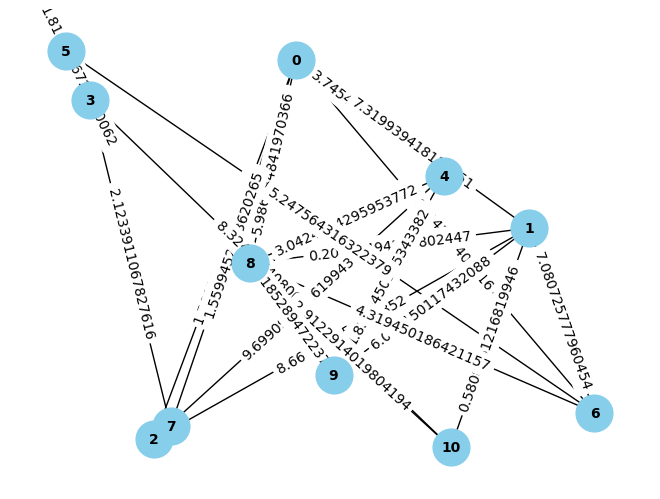

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json

# Générer des coordonnées aléatoires pour les villes
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    cities = np.random.rand(num_cities, 2) * 100
    return cities

# Générer un graphe aléatoire
def generate_random_graph(num_nodes, avg_degree, seed=42):
    np.random.seed(seed)
    G = nx.gnm_random_graph(num_nodes, int(num_nodes * avg_degree / 2), seed=seed)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = np.random.rand() * 10
    return G

# Calculer les plus courts chemins dans le graphe d'origine
def calculate_shortest_paths(G):
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Construire le graphe complet avec les longueurs des plus courts chemins
def build_complete_graph(shortest_paths, num_nodes):
    complete_graph = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            complete_graph[i, j] = shortest_paths[i][j]
    return complete_graph

# Sauvegarder les données dans un fichier texte
def save_to_file(cities, distances, filename):
    data = {
        "cities": cities.tolist(),
        "distances": distances.tolist()
    }
    with open(filename, 'w') as f:
        json.dump(data, f)

# Visualiser le graphe
def plot_graph(G, cities):
    pos = {i: cities[i] for i in range(len(cities))}
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Exemple d'utilisation
num_cities = np.random.randint(5, 15)  # Nombre de sommets entre 21 et 131
avg_degree = np.random.uniform(1, 4)  # Degré moyen aléatoire réaliste

# Génération des villes et du graphe aléatoire
cities = generate_cities(num_cities)
G = generate_random_graph(num_cities, avg_degree)
shortest_paths = calculate_shortest_paths(G)
# complete_graph = build_complete_graph(shortest_paths, num_cities)

# Sauvegarder les données dans un fichier texte
print(cities)
print(G)
# save_to_file(cities, 'vrp_data.txt')

# Afficher quelques informations pour validation
print("Nombre de villes : ", num_cities)
print("Degré moyen : ", avg_degree)
print("Données sauvegardées dans 'vrp_data.txt'")

# Visualiser le graphe
plot_graph(G, cities)


[[37.45401188 95.07143064]
 [73.19939418 59.86584842]
 [15.60186404 15.59945203]
 [ 5.80836122 86.61761458]
 [60.11150117 70.80725778]
 [ 2.05844943 96.99098522]]
Graph with 6 nodes and 15 edges
Nombre de villes :  6
Degré moyen :  1.0466656632136155
Données sauvegardées dans 'vrp_data.txt'


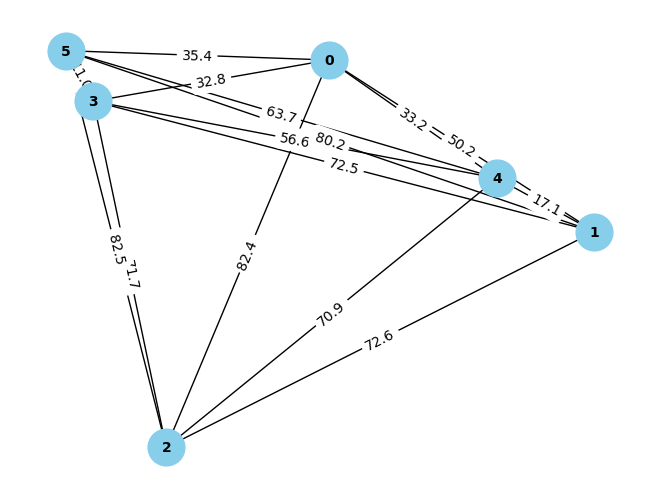

In [4]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json

# Générer des coordonnées aléatoires pour les villes
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    cities = np.random.rand(num_cities, 2) * 100
    return cities

# Générer un graphe connexe avec des distances réalistes
def generate_connected_graph(cities):
    num_nodes = len(cities)
    G = nx.Graph()
    
    # Calculer les distances euclidiennes entre les villes
    distances = cdist(cities, cities, 'euclidean')
    
    # Ajouter les arêtes pour former un arbre couvrant minimal (MST)
    mst = nx.minimum_spanning_tree(nx.Graph(distances))
    
    for u, v, data in mst.edges(data=True):
        G.add_edge(u, v, weight=round(data['weight'], 1))
    
    # Ajouter des arêtes supplémentaires pour atteindre le degré moyen souhaité
    while nx.is_connected(G) and G.number_of_edges() < num_nodes * (num_nodes - 1) // 2:
        u, v = np.random.choice(num_nodes, 2, replace=False)
        if not G.has_edge(u, v):
            G.add_edge(u, v, weight=round(distances[u, v], 1))
            
    return G

# Calculer les plus courts chemins dans le graphe d'origine
def calculate_shortest_paths(G):
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Construire le graphe complet avec les longueurs des plus courts chemins
def build_complete_graph(shortest_paths, num_nodes):
    complete_graph = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            complete_graph[i, j] = shortest_paths[i][j]
    return complete_graph

# Sauvegarder les données dans un fichier texte
def save_to_file(cities, distances, filename):
    data = {
        "cities": cities.tolist(),
        "distances": distances.tolist()
    }
    with open(filename, 'w') as f:
        json.dump(data, f)

# Visualiser le graphe
def plot_graph(G, cities):
    pos = {i: cities[i] for i in range(len(cities))}
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Exemple d'utilisation
num_cities = np.random.randint(5, 10)  # Nombre de sommets entre 5 et 14
avg_degree = np.random.uniform(1, 2)  # Degré moyen aléatoire réaliste

# Génération des villes et du graphe aléatoire
cities = generate_cities(num_cities)
G = generate_connected_graph(cities)
shortest_paths = calculate_shortest_paths(G)
# complete_graph = build_complete_graph(shortest_paths, num_cities)

# Sauvegarder les données dans un fichier texte
print(cities)
print(G)
# save_to_file(cities, 'vrp_data.txt')

# Afficher quelques informations pour validation
print("Nombre de villes : ", num_cities)
print("Degré moyen : ", avg_degree)
print("Données sauvegardées dans 'vrp_data.txt'")

# Visualiser le graphe
plot_graph(G, cities)


In [5]:
#iCi cesi
from random import randint, randrange, shuffle

import networkx as nx
import matplotlib.pyplot as plt
import json
from save import saveInstance


class VRPGenerator:
    """Classe générant un graphe connexe et utilisable pour le problème VRP.
    Caractérisé par :
    - son réalisme (0 ou 1)
    - un fichier json
    """

    # Liste qui va stocker les données du fichier JSON
    data = []
    # Notre graphe
    G = 0
    # Realisme activé ou désactivé (1 ou 0), définit si les villes sont placées en fonction de leur lat/lng ou
    # aléatoirement
    realisme = 0
    # La variable contenant le path du fichier JSON
    json_file = ''
    # La limite d'arrêtes par sommets
    LIMITE = 5
    BORNEMIN = 0
    BORNEMAX = 10
    TAILLE_DATA = 0

    DEPART = 0
    C_MIN = 1
    C_MAX = 10


    graphe = 0

    def __init__(self, realisme, json_file, taille, bornemin, bornemax, c_min, c_max, c_camion, s_depart):
        """Constructeur de notre classe"""
        self.realisme = realisme
        self.json_file = json_file
        self.TAILLE_DATA = taille
        self.BORNEMIN = bornemin
        self.BORNEMAX = bornemax
        self.DEPART = s_depart
        self.C_MIN = c_min
        self.C_MAX = c_max

        self.graphe = self.vrp_generate()

        matrice_instance = self.gen_matrice_ponderation()
        capacite = self.generate_capacite()

        #Enregistre matrice_ponderation.txt
        file = open('/home/thomas/Bureau/Dev/CESI-Projet-DATA/DATASET/Texte/matrice_ponderation_t=' + str(
            taille) + '_bmin=' + str(bornemin) + '_bmax=' + str(bornemax) + '.txt', 'w')
        file.write(str(matrice_instance))
        file.close()

        # Enregistre capacite.txt
        file = open('/home/thomas/Bureau/Dev/CESI-Projet-DATA/DATASET/Texte/capacite_t=' + str(taille) + '_cmin=' + str(
            c_min) + '_cmax=' + str(c_max) + '_ccamion=' + str(c_camion) + '_sdepart=' + str(s_depart) + '.txt', 'w')
        file.write(str(capacite))
        file.close()

        saveInstance(self.graphe,
                     '/home/thomas/Bureau/Dev/CESI-Projet-DATA/DATASET/Objets/graphe_t=' + str(taille) + '_bmin=' + str(
                         bornemin) + '_bmax=' + str(bornemax))

        saveInstance(matrice_instance,
                     '/home/thomas/Bureau/Dev/CESI-Projet-DATA/DATASET/Objets/matrice_ponderation_t=' + str(
                         taille) + '_bmin=' + str(bornemin) + '_bmax=' + str(bornemax))

        saveInstance(capacite, '/home/thomas/Bureau/Dev/CESI-Projet-DATA/DATASET/Objets/capacite_t=' + str(
            taille) + '_cmin=' + str(
            c_min) + '_cmax=' + str(c_max) + '_ccamion=' + str(c_camion) + '_sdepart=' + str(s_depart))



    def vrp_generate(self):
        # JSON Config
        # On charge le fichier json dans la variable data
        with open(self.json_file) as f:
            self.data = json.load(f)

        self.G = nx.Graph()
        self.reduire_echantillon(self.TAILLE_DATA)

        if self.realisme == 1:
            # On crée le triangle de départ
            for i in range(0, 3):
                self.G.add_node(self.data[i]["name"], pos=(self.lat(i), self.lng(i)))
            self.G.add_edge(self.data[0]["name"], self.data[1]["name"], weight=randint(self.BORNEMIN, self.BORNEMAX))
            self.G.add_edge(self.data[2]["name"], self.data[0]["name"], weight=randint(self.BORNEMIN, self.BORNEMAX))
            self.G.add_edge(self.data[2]["name"], self.data[1]["name"], weight=randint(self.BORNEMIN, self.BORNEMAX))

            self.G = self.vrp_realiste()

            # On dessine notre graphe
            nx.draw(self.G, nx.get_node_attributes(self.G, 'pos'), node_size=75, with_labels=True)
        elif self.realisme == 0:
            for i in range(0, 3):
                self.G.add_node(self.data[i]["name"])

            self.G.add_edge(self.data[0]["name"], self.data[1]["name"], weight=randint(self.BORNEMIN, self.BORNEMAX))
            self.G.add_edge(self.data[2]["name"], self.data[0]["name"], weight=randint(self.BORNEMIN, self.BORNEMAX))
            self.G.add_edge(self.data[2]["name"], self.data[1]["name"], weight=randint(self.BORNEMIN, self.BORNEMAX))

            self.G = self.vrp_standard()

            # On dessine notre graphe
            nx.draw(self.G, node_size=75, with_labels=True)
        elif self.realisme == 2:
            for n in range(0, len(self.data)):
                current_node = self.data[n]["name"]
                self.G.add_node(current_node)

            self.G = self.vrp_complet()

            nx.draw(self.G, node_size=75, with_labels=True)
        return self.G;

    def vrp_complet(self):
        for i in range(0, len(self.data)):
            current_node = self.data[i]["name"]
            for j in range(0, len(self.data)):
                node_cible = self.data[j]["name"]
                self.G.add_edge(current_node, node_cible, weight=randint(self.BORNEMIN, self.BORNEMAX))
        return self.G;

    def vrp_standard(self):
        # Pour tous les sommets à partir de 3 dans notre JSON
        for j in range(3, len(self.data)):
            # On génere un nombre d'arrête aléatoire entre 2 et n-1, n étant notre nombre de sommets
            nbr_edge = self.limite_edge(randint(2, len(self.G.node) - 1), self.LIMITE)

            current_node = self.data[j]["name"]

            # On l'ajoute à notre graphe
            self.G.add_node(current_node)

            # On ajoute autant d'arrêtes que la variable nbr_edge
            for n in range(1, nbr_edge + 1):
                rand = randint(0, len(self.G.node) - 1)
                cpt = 0

                for node in self.G:
                    if self.G.has_edge(current_node, node):
                        cpt += 1
                if cpt == len(self.G.node):
                    break;

                while self.G.has_edge(current_node, self.data[rand]["name"]) | rand == j:
                    rand = randint(0, len(self.G.node) - 1)

                node_cible = self.data[rand]["name"]
                self.G.add_edge(current_node, node_cible, weight=randint(self.BORNEMIN, self.BORNEMAX))
        return self.G;

    def vrp_realiste(self):
        # Pour tous les sommets à partir de 3 dans notre JSON
        for j in range(3, len(self.data)):
            # On génere un nombre d'arrête aléatoire entre 2 et n-1, n étant notre nombre de sommets
            nbr_edge = self.limite_edge(randint(2, len(self.G.node) - 1), self.LIMITE)

            current_node = self.data[j]["name"]

            # On l'ajoute à notre graphe
            self.G.add_node(current_node, pos=(self.lat(j), self.lng(j)))

            # On ajoute autant d'arrêtes que la variable nbr_edge
            for n in range(1, nbr_edge + 1):
                rand = randint(0, len(self.G.node) - 1)
                cpt = 0

                for node in self.G:
                    if self.G.has_edge(current_node, node):
                        cpt += 1
                if cpt == len(self.G.node):
                    break;

                while self.G.has_edge(current_node, self.data[rand]["name"]) | rand == j:
                    rand = randint(0, len(self.G.node) - 1)

                node_cible = self.data[rand]["name"]
                self.G.add_edge(current_node, node_cible, weight=randint(self.BORNEMIN, self.BORNEMAX))
        return self.G;

    def generate_capacite(self):
        capacite_ville = []
        for n in range(1, len(self.data)):
            capacite_ville.append(randrange(self.C_MIN, self.C_MAX))
        shuffle(capacite_ville)
        capacite_ville.insert(self.DEPART, 0)
        return capacite_ville;

    def gen_matrice_ponderation(self):
        foo = []
        for i in range(0, self.TAILLE_DATA):
            chemin = []
            for j in range(0, self.TAILLE_DATA):
                if i == j:
                    chemin.append(0)
                else:
                    chemin.append(randint(self.BORNEMIN, self.BORNEMAX))
            foo.append(chemin)
        return foo;

    # Fonction qui va recupère la position dans la liste en latitude
    def lat(self, i):
        latitude = self.data[i]["lat"]
        return float(latitude);

    # Fonction qui va recupère la position dans la liste en longitude
    def lng(self, i):
        longitude = self.data[i]["lng"]
        return float(longitude);

    # Fonction qui limite le nombre d'arrêtes possible
    def limite_edge(self, n, limite):
        if n >= limite:
            return n;
        return randint(2, limite);

    # Fonction utilisé pour réduire la taille de la liste
    def reduire_echantillon(self, taille_data):
        while len(self.data) > taille_data:
            self.data.pop(1)
        return self.data;

    def show_graph(self):
        plt.show()
        return 0;

ImportError: cannot import name 'saveInstance' from 'save' (/home/silentsky/anaconda3/lib/python3.11/site-packages/save/__init__.py)

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json

# Générer des coordonnées aléatoires pour les villes
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    cities = np.random.rand(num_cities, 2) * 100
    return cities

# Générer un graphe connexe avec des distances réalistes
def generate_connected_graph(cities):
    num_nodes = len(cities)
    G = nx.Graph()
    
    # Calculer les distances euclidiennes entre les villes
    distances = cdist(cities, cities, 'euclidean')
    
    # Ajouter les arêtes pour former un arbre couvrant minimal (MST)
    mst = nx.minimum_spanning_tree(nx.Graph(distances))
    
    for u, v, data in mst.edges(data=True):
        G.add_edge(u, v, weight=round(data['weight'], 1))
    
    # Ajouter des arêtes supplémentaires pour atteindre le degré moyen souhaité
    while nx.is_connected(G) and G.number_of_edges() < num_nodes * (num_nodes - 1) // 2:
        u, v = np.random.choice(num_nodes, 2, replace=False)
        if not G.has_edge(u, v):
            G.add_edge(u, v, weight=round(distances[u, v], 1))
            
    return G

# Calculer les plus courts chemins dans le graphe d'origine
def calculate_shortest_paths(G):
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Construire le graphe complet avec les longueurs des plus courts chemins
def build_complete_graph(shortest_paths, num_nodes):
    complete_graph = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            complete_graph[i, j] = shortest_paths[i][j]
    return complete_graph

# Sauvegarder les données dans un fichier texte
def save_to_file(cities, distances, filename):
    data = {
        "cities": cities.tolist(),
        "distances": distances.tolist()
    }
    with open(filename, 'w') as f:
        json.dump(data, f)

# Visualiser le graphe
def plot_graph(G, cities):
    pos = nx.spring_layout(G, seed=42, k=2/np.sqrt(len(G.nodes())))
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title("Graph des villes avec les distances pondérées")
    plt.show()

# Exemple d'utilisation
num_cities = np.random.randint(5, 15)  # Nombre de sommets entre 5 et 14
avg_degree = np.random.uniform(1, 3)  # Degré moyen aléatoire réaliste

# Génération des villes et du graphe aléatoire
cities = generate_cities(num_cities)
G = generate_connected_graph(cities)
shortest_paths = calculate_shortest_paths(G)
# complete_graph = build_complete_graph(shortest_paths, num_cities)

# Sauvegarder les données dans un fichier texte
print(cities)
print(G)
# save_to_file(cities, 'vrp_data.txt')

# Afficher quelques informations pour validation
print("Nombre de villes : ", num_cities)
print("Degré moyen : ", avg_degree)
print("Données sauvegardées dans 'vrp_data.txt'")

# Visualiser le graphe
plot_graph(G, cities)


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json

# Générer des coordonnées aléatoires pour les villes
def generate_cities(num_cities, seed=42):
    """Génère des coordonnées aléatoires pour un nombre donné de villes.

    Args:
        num_cities (int): Nombre de villes à générer.
        seed (int): Graine pour la reproductibilité des résultats aléatoires.

    Returns:
        numpy.ndarray: Tableau de coordonnées des villes, chaque ligne contenant les coordonnées (x, y) d'une ville.
    """
    np.random.seed(seed)
    cities = np.random.rand(num_cities, 2) * 100
    return cities

# Générer un graphe connexe avec des distances réalistes
def generate_connected_graph(cities):
    """Génère un graphe pondéré connexe à partir des coordonnées des villes.

    Utilise l'algorithme de Kruskal pour obtenir un arbre couvrant minimal (MST),
    puis ajoute des arêtes aléatoires pour atteindre le degré moyen souhaité.

    Args:
        cities (numpy.ndarray): Tableau de coordonnées des villes.

    Returns:
        networkx.Graph: Graphe pondéré connexe généré.
    """
    num_nodes = len(cities)
    G = nx.Graph()
    
    # Calculer les distances euclidiennes entre les villes
    distances = cdist(cities, cities, 'euclidean')
    
    # Ajouter les arêtes pour former un arbre couvrant minimal (MST)
    mst = nx.minimum_spanning_tree(nx.Graph(distances))
    
    for u, v, data in mst.edges(data=True):
        G.add_edge(u, v, weight=round(data['weight'], 1))
    
    # Ajouter des arêtes supplémentaires pour atteindre le degré moyen souhaité
    while nx.is_connected(G) and G.number_of_edges() < num_nodes * (num_nodes - 1) // 2:
        u, v = np.random.choice(num_nodes, 2, replace=False)
        if not G.has_edge(u, v):
            G.add_edge(u, v, weight=round(distances[u, v], 1))
            
    return G

# Calculer les plus courts chemins dans le graphe d'origine
def calculate_shortest_paths(G):
    """Calcule les longueurs des plus courts chemins entre tous les paires de nœuds dans un graphe pondéré.

    Utilise l'algorithme de Dijkstra pour calculer les plus courts chemins.

    Args:
        G (networkx.Graph): Graphe pondéré.

    Returns:
        dict: Dictionnaire de dictionnaires contenant les longueurs des plus courts chemins.
              Exemple : {0: {0: 0, 1: 2.3, ...}, 1: {0: 2.3, 1: 0, ...}, ...}
    """
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Sauvegarder les données dans un fichier texte
def save_to_file(cities, distances, filename):
    """Sauvegarde les données de villes et de distances dans un fichier JSON.

    Args:
        cities (numpy.ndarray): Tableau de coordonnées des villes.
        distances (numpy.ndarray): Tableau des distances entre les villes.
        filename (str): Nom du fichier de sauvegarde.
    """
    data = {
        "cities": cities.tolist(),
        "distances": distances.tolist()
    }
    with open(filename, 'w') as f:
        json.dump(data, f)

# Visualiser le graphe
def plot_graph(G, cities):
    """Visualise un graphe pondéré avec les coordonnées des villes.

    Utilise NetworkX et Matplotlib pour dessiner le graphe.

    Args:
        G (networkx.Graph): Graphe pondéré.
        cities (numpy.ndarray): Tableau de coordonnées des villes.
    """
    # Disposition des nœuds pour une meilleure visualisation
    pos = nx.spring_layout(G, seed=42, k=2/np.sqrt(len(G.nodes())))
    
    # Affichage du graphe
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    
    # Affichage des étiquettes des arêtes
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    
    # Affichage du titre
    plt.title("Graph des villes avec les distances pondérées")
    plt.show()

# Exemple d'utilisation
if __name__ == "__main__":
    # Génération des paramètres aléatoires pour l'exemple
    num_cities = np.random.randint(5, 15)  # Nombre de sommets entre 5 et 14
    avg_degree = np.random.uniform(1, 4)  # Degré moyen aléatoire réaliste
    
    # Génération des villes et du graphe aléatoire
    cities = generate_cities(num_cities)
    G = generate_connected_graph(cities)
    shortest_paths = calculate_shortest_paths(G)
    
    # Affichage des informations sur la génération
    print("Nombre de villes : ", num_cities)
    print("Degré moyen : ", avg_degree)
    
    # Visualisation du graphe
    plot_graph(G, cities)


# Définitions des termes

    Sommet (Node/Vertex): Un point dans un graphe qui représente un lieu ou une entité distincte. Dans ce code, chaque ville est un sommet.
    Arête (Edge): Une ligne qui connecte deux sommets dans un graphe, représentant une relation ou une connexion entre eux. Ici, les arêtes représentent les routes entre les villes.
    Degré (Degree): Le nombre d'arêtes connectées à un sommet. Par exemple, si une ville est connectée à trois autres villes, son degré est 3.
    Définition du Degré Moyen

    Degré moyen (Average Degree): Le degré moyen d'un graphe est la moyenne des degrés de tous les sommets du graphe. Pour un graphe avec nn sommets et mm arêtes, le degré moyen est calculé comme :

    Degreˊ moyen=2mnDegreˊ moyen=n2m​
    
    Connexe (Connected): Un graphe est connexe si, pour chaque paire de sommets, il existe un chemin entre eux. Cela signifie que toutes les villes peuvent être atteintes à partir de n'importe quelle autre ville.
    Multigraphe (Multigraph): Un graphe où plusieurs arêtes peuvent exister entre deux sommets. Dans notre cas, nous ne considérons pas les multigraphes.
    MST (Minimum Spanning Tree): Un sous-ensemble d'un graphe connexe qui connecte tous les sommets avec le coût total minimum sans cycles.

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json

# Générer des coordonnées aléatoires pour les villes
# num_cities : Nombre de villes (sommets)
# seed : Graine pour le générateur de nombres aléatoires pour reproduire les résultats
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    cities = np.random.rand(num_cities, 2) * 100
    return cities

# Générer un graphe connexe avec des distances réalistes entre les villes
# cities : Coordonnées des villes
def generate_connected_graph(cities):
    num_nodes = len(cities)
    G = nx.Graph()
    
    # Calculer les distances euclidiennes entre les villes
    distances = cdist(cities, cities, 'euclidean')
    
    # Ajouter les arêtes pour former un arbre couvrant minimal (MST) pour garantir que le graphe est connexe
    mst = nx.minimum_spanning_tree(nx.Graph(distances))
    
    for u, v, data in mst.edges(data=True):
        G.add_edge(u, v, weight=round(data['weight'], 1))
    
    # Ajouter des arêtes supplémentaires aléatoires pour atteindre le degré moyen souhaité tout en évitant les doublons
    while nx.is_connected(G) and G.number_of_edges() < num_nodes * (num_nodes - 1) // 2:
        u, v = np.random.choice(num_nodes, 2, replace=False)
        if not G.has_edge(u, v):
            G.add_edge(u, v, weight=round(distances[u, v], 1))
            
    return G

# Calculer les plus courts chemins dans le graphe d'origine
# G : Le graphe des villes
def calculate_shortest_paths(G):
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Construire le graphe complet avec les longueurs des plus courts chemins
# shortest_paths : Dictionnaire des plus courts chemins
# num_nodes : Nombre de villes (sommets)
def build_complete_graph(shortest_paths, num_nodes):
    complete_graph = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            complete_graph[i, j] = shortest_paths[i][j]
    return complete_graph

# Sauvegarder les données des villes et des distances dans un fichier JSON
# cities : Coordonnées des villes
# distances : Matrice des distances
# filename : Nom du fichier de sortie
def save_to_file(cities, distances, filename):
    data = {
        "cities": cities.tolist(),
        "distances": distances.tolist()
    }
    with open(filename, 'w') as f:
        json.dump(data, f)

# Visualiser le graphe
# G : Le graphe des villes
# cities : Coordonnées des villes
def plot_graph(G, cities):
    pos = nx.spring_layout(G, seed=42, k=2/np.sqrt(len(G.nodes())))
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title("Graph des villes avec les distances pondérées")
    plt.show()

# Exemple d'utilisation
num_cities = np.random.randint(5, 15)  # Nombre de sommets (villes) entre 5 et 14
avg_degree = np.random.uniform(1, 4)  # Degré moyen aléatoire réaliste

# Génération des villes et du graphe connexe
cities = generate_cities(num_cities)
G = generate_connected_graph(cities)
shortest_paths = calculate_shortest_paths(G)
# complete_graph = build_complete_graph(shortest_paths, num_cities)

# Sauvegarder les données dans un fichier texte (optionnel)
# save_to_file(cities, 'vrp_data.txt')

# Afficher quelques informations pour validation
print("Coordonnées des villes :\n", cities)
print("Graphe des villes :\n", G)
print("Nombre de villes : ", num_cities)
print("Degré moyen : ", avg_degree)
print("Données sauvegardées dans 'vrp_data.txt'")

# Visualiser le graphe
plot_graph(G, cities)


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json
from tabulate import tabulate

# Générer des coordonnées aléatoires pour les villes
# num_cities : Nombre de villes (sommets)
# seed : Graine pour le générateur de nombres aléatoires pour reproduire les résultats
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    cities = np.random.rand(num_cities, 2) * 100
    return cities

# Générer un graphe connexe avec des distances réalistes entre les villes
# cities : Coordonnées des villes
# limit : Limite du nombre d'arêtes par sommet
# min_weight, max_weight : Bornes pour les poids des arêtes
def generate_connected_graph(cities, limit=5, min_weight=1, max_weight=10):
    num_nodes = len(cities)
    G = nx.Graph()
    
    # Calculer les distances euclidiennes entre les villes
    distances = cdist(cities, cities, 'euclidean')
    
    # Ajouter les arêtes pour former un arbre couvrant minimal (MST) pour garantir que le graphe est connexe
    mst = nx.minimum_spanning_tree(nx.Graph(distances))
    
    for u, v, data in mst.edges(data=True):
        G.add_edge(u, v, weight=round(np.clip(data['weight'], min_weight, max_weight), 1))
    
    # Ajouter des arêtes supplémentaires aléatoires pour atteindre le degré moyen souhaité tout en évitant les doublons
    while nx.is_connected(G) and G.number_of_edges() < num_nodes * (num_nodes - 1) // 2:
        u, v = np.random.choice(num_nodes, 2, replace=False)
        if not G.has_edge(u, v) and G.degree[u] < limit and G.degree[v] < limit:
            G.add_edge(u, v, weight=round(np.clip(distances[u, v], min_weight, max_weight), 1))
            
    return G

# Calculer les plus courts chemins dans le graphe d'origine
# G : Le graphe des villes
def calculate_shortest_paths(G):
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Construire le graphe complet avec les longueurs des plus courts chemins
# shortest_paths : Dictionnaire des plus courts chemins
# num_nodes : Nombre de villes (sommets)
def build_complete_graph(shortest_paths, num_nodes):
    complete_graph = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            complete_graph[i, j] = shortest_paths[i][j]
    return complete_graph

# Générer les capacités pour les villes
# num_cities : Nombre de villes
# min_capacity, max_capacity : Bornes pour les capacités
# depot_index : Index du dépôt (capacité 0)
def generate_capacities(num_cities, min_capacity=1, max_capacity=10, depot_index=0):
    capacities = np.random.randint(min_capacity, max_capacity + 1, size=num_cities)
    capacities[depot_index] = 0
    return capacities.tolist()

# Sauvegarder les données des villes et des distances dans un fichier JSON
# cities : Coordonnées des villes
# distances : Matrice des distances
# filename : Nom du fichier de sortie
def save_to_file(cities, distances, capacities, filename):
    data = {
        "cities": cities.tolist(),
        "distances": distances.tolist(),
        "capacities": capacities
    }
    with open(filename, 'w') as f:
        json.dump(data, f)

# Visualiser le graphe
# G : Le graphe des villes
# cities : Coordonnées des villes
def plot_graph(G, cities):
    pos = {i: (city[0], city[1]) for i, city in enumerate(cities)}
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title("Graph des villes avec les distances pondérées")
    plt.show()

# Exemple d'utilisation
num_cities = np.random.randint(5, 15)  # Nombre de sommets (villes) entre 5 et 14
avg_degree = np.random.uniform(1, 4)  # Degré moyen aléatoire réaliste

# Paramètres supplémentaires
limit = 5  # Limite du nombre d'arêtes par sommet
min_weight = 1  # Poids minimum pour les arêtes
max_weight = 30  # Poids maximum pour les arêtes
min_capacity = 4  # Capacité minimale pour les villes
max_capacity = 30  # Capacité maximale pour les villes
depot_index = 0  # Index du dépôt

# Génération des villes et du graphe connexe
cities = generate_cities(num_cities)
G = generate_connected_graph(cities, limit, min_weight, max_weight)
shortest_paths = calculate_shortest_paths(G)
complete_graph = build_complete_graph(shortest_paths, num_cities)
capacities = generate_capacities(num_cities, min_capacity, max_capacity, depot_index)

# Sauvegarder les données dans un fichier JSON
save_to_file(cities, complete_graph, capacities, 'vrp_data.json')

# Afficher quelques informations pour validation
print("Coordonnées des villes :\n", cities)
print("Capacités des villes :\n", capacities)
print("Graphe des villes :\n", G)
print("Nombre de villes : ", num_cities)
print("Degré moyen : ", avg_degree)
print("Données sauvegardées dans 'vrp_data.json'")

# Imprimer les informations sous forme de tableau
table = [
    ["Nombre de villes", num_cities],
    ["Degré moyen", avg_degree],
    ["Limite d'arêtes par sommet", limit],
    ["Poids minimum des arêtes", min_weight],
    ["Poids maximum des arêtes", max_weight],
    ["Capacité minimale", min_capacity],
    ["Capacité maximale", max_capacity],
    ["Index du dépôt", depot_index]
]
print("\nParamètres de génération du VRP :")
print(tabulate(table, headers=["Paramètre", "Valeur"], tablefmt="pretty"))
print(table)
# Visualiser le graphe
plot_graph(G, cities)

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json
from tabulate import tabulate

# Générer des coordonnées aléatoires pour les villes
# num_cities : Nombre de villes (sommets)
# seed : Graine pour le générateur de nombres aléatoires pour reproduire les résultats
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    cities = np.random.rand(num_cities, 2) * 100
    return cities

# Générer un graphe connexe avec des distances réalistes entre les villes
# cities : Coordonnées des villes
# limit : Limite du nombre d'arêtes par sommet
# min_weight, max_weight : Bornes pour les poids des arêtes
def generate_connected_graph(cities, limit=5, min_weight=1, max_weight=10):
    num_nodes = len(cities)
    G = nx.Graph()
    
    # Calculer les distances euclidiennes entre les villes
    distances = cdist(cities, cities, 'euclidean')
    
    # Ajouter les arêtes pour former un arbre couvrant minimal (MST) pour garantir que le graphe est connexe
    mst = nx.minimum_spanning_tree(nx.Graph(distances))
    
    for u, v, data in mst.edges(data=True):
        G.add_edge(u, v, weight=round(np.clip(data['weight'], min_weight, max_weight), 1))
    
    # Ajouter des arêtes supplémentaires aléatoires pour atteindre le degré moyen souhaité tout en évitant les doublons
    while nx.is_connected(G) and G.number_of_edges() < num_nodes * (num_nodes - 1) // 2:
        u, v = np.random.choice(num_nodes, 2, replace=False)
        if not G.has_edge(u, v) and G.degree[u] < limit and G.degree[v] < limit:
            G.add_edge(u, v, weight=round(np.clip(distances[u, v], min_weight, max_weight), 1))
            
    return G

# Calculer les plus courts chemins dans le graphe d'origine
# G : Le graphe des villes
def calculate_shortest_paths(G):
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Construire le graphe complet avec les longueurs des plus courts chemins
# shortest_paths : Dictionnaire des plus courts chemins
# num_nodes : Nombre de villes (sommets)
def build_complete_graph(shortest_paths, num_nodes):
    complete_graph = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            complete_graph[i, j] = shortest_paths[i][j]
    return complete_graph

# Générer les capacités pour les villes
# num_cities : Nombre de villes
# min_capacity, max_capacity : Bornes pour les capacités
# depot_index : Index du dépôt (capacité 0)
def generate_capacities(num_cities, min_capacity=1, max_capacity=10, depot_index=0):
    capacities = np.random.randint(min_capacity, max_capacity + 1, size=num_cities)
    capacities[depot_index] = 0
    return capacities.tolist()

# Sauvegarder les données des villes et des distances dans un fichier JSON
# cities : Coordonnées des villes
# distances : Matrice des distances
# filename : Nom du fichier de sortie
def save_to_file(cities, distances, capacities, filename):
    data = {
        "cities": cities.tolist(),
        "distances": distances.tolist(),
        "capacities": capacities
    }
    with open(filename, 'w') as f:
        json.dump(data, f)

# Visualiser le graphe
# G : Le graphe des villes
# cities : Coordonnées des villes
def plot_graph(G, cities):
    pos = {i: (city[0], city[1]) for i, city in enumerate(cities)}
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title("Graph des villes avec les distances pondérées")
    plt.show()

# Exemple d'utilisation
num_cities = np.random.randint(1, 15)  # Nombre de sommets (villes) entre 5 et 14
avg_degree = np.random.uniform(1, 4)  # Degré moyen aléatoire réaliste

# Paramètres supplémentaires
limit = 5  # Limite du nombre d'arêtes par sommet
min_weight = 1  # Poids minimum pour les arêtes
max_weight = 10  # Poids maximum pour les arêtes
min_capacity = 1  # Capacité minimale pour les villes
max_capacity = 10  # Capacité maximale pour les villes
depot_index = 0  # Index du dépôt

# Génération des villes et du graphe connexe
cities = generate_cities(num_cities)
G = generate_connected_graph(cities, limit, min_weight, max_weight)
shortest_paths = calculate_shortest_paths(G)
complete_graph = build_complete_graph(shortest_paths, num_cities)
capacities = generate_capacities(num_cities, min_capacity, max_capacity, depot_index)

# Sauvegarder les données dans un fichier JSON
# save_to_file(cities, complete_graph, capacities, 'vrp_data.json')

# Afficher quelques informations pour validation
print("Coordonnées des villes :\n", cities)
print("Capacités des villes :\n", capacities)
print("Graphe des villes :\n", G)
print("Nombre de villes : ", num_cities)
print("Degré moyen : ", avg_degree)
print("Données sauvegardées dans 'vrp_data.json'")

# Imprimer les informations sous forme de tableau
table = [
    ["Nombre de villes", num_cities],
    ["Degré moyen", avg_degree],
    ["Limite d'arêtes par sommet", limit],
    ["Poids minimum des arêtes", min_weight],
    ["Poids maximum des arêtes", max_weight],
    ["Capacité minimale", min_capacity],
    ["Capacité maximale", max_capacity],
    ["Index du dépôt", depot_index]
]
print("\nParamètres de génération du VRP :")
print(tabulate(table, headers=["Paramètre", "Valeur"], tablefmt="pretty"))

# Visualiser le graphe
plot_graph(G, cities)